# Task 3 - Cuisine Classification

In [20]:
#import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
task3 = pd.read_csv("cleaned2.csv")

In [9]:
task3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Rating text are as follows: 
Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


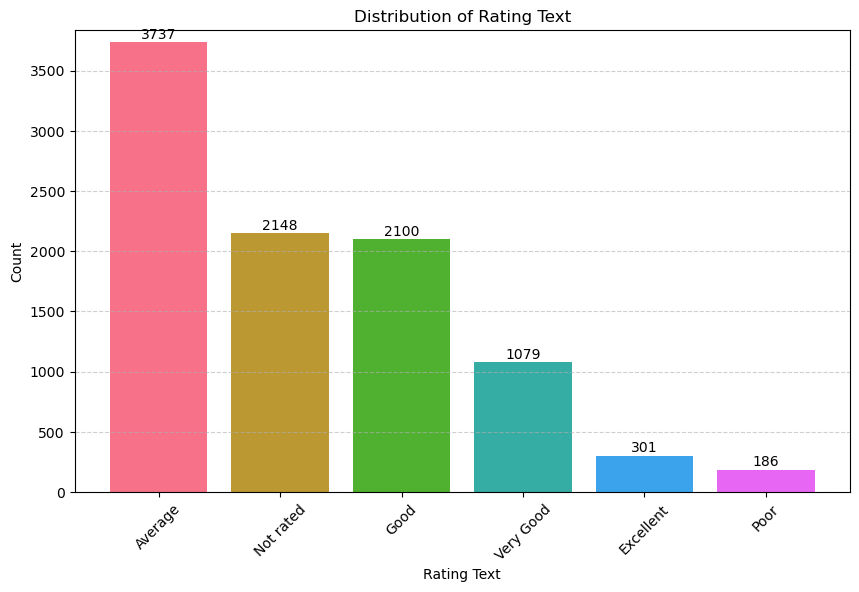

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9546    Positive
9547    Positive
9548    Positive
9549    Positive
9550    Positive
Name: Sentiment, Length: 9551, dtype: object

In [10]:
text_reviews = task3['Rating text'].value_counts()
print("Rating text are as follows: ")
print(text_reviews)

sentiment_mapping = {
    'Good': 'Positive',
    'Very Good': 'Positive',
    'Excellent': 'Positive',
    'Poor': 'Negative',
    'Not rated': 'Neutral',
    'Average': 'Neutral',
}

custom_palette = sns.color_palette("husl", len(text_reviews))
task3['Sentiment'] = task3['Rating text'].map(sentiment_mapping)
plt.figure(figsize=(10, 6))
bars = plt.bar(text_reviews.index, text_reviews.values, color=custom_palette)

plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Distribution of Rating Text')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, text_reviews.max() + 100)

for bar, count in zip(bars, text_reviews.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count), ha='center', va='bottom')

plt.show()

task3['Sentiment']

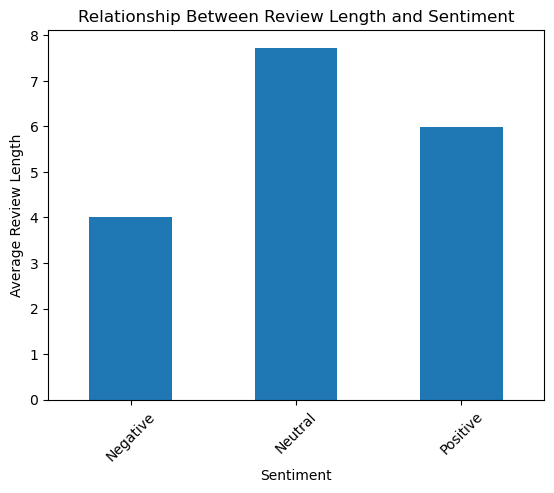

Average Review Length by Sentiment:
Sentiment
Negative    4.000000
Neutral     7.729992
Positive    5.982759
Name: Review Length, dtype: float64


In [11]:
task3['Review Length'] = task3['Rating text'].str.len()
task3['Review Length']
average_review_length = task3.groupby('Sentiment')['Review Length'].mean()

average_review_length.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.title('Relationship Between Review Length and Sentiment')
plt.xticks(rotation=45)
plt.show()

print("Average Review Length by Sentiment:")
print(average_review_length)

In [12]:
from scipy.stats import pearsonr
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
}
task3['Sentiment_numeric'] = task3['Sentiment'].map(sentiment_mapping)

correlation_coefficient, _ = pearsonr(task3['Review Length'], task3['Sentiment_numeric'])

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.32563686705010875


# L3 - T2 : Votes Analysis

In [13]:
restaurant_with_highest_votes = task3.nlargest(1, 'Votes')
restaurant_with_lowest_votes = task3.nsmallest(1, 'Votes')

result_df = pd.DataFrame({
    'Restaurant with High Votes': restaurant_with_highest_votes.values[0],
    'Restaurant with Low Votes': restaurant_with_lowest_votes.values[0]
}, index=task3.columns)
task3

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment,Review Length,Sentiment_numeric
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Positive,9,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,Positive,9,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,Positive,9,1
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,4,4.9,Dark Green,Excellent,365,Positive,9,1
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,4,4.8,Dark Green,Excellent,229,Positive,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml1 Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R1ht1m Cadd...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,No,No,3,4.1,Green,Very Good,788,Positive,9,1
9547,5908749,Ceviz Aac1,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,3,4.2,Green,Very Good,1034,Positive,9,1
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,4,3.7,Yellow,Good,661,Positive,4,1
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,4,4.0,Green,Very Good,901,Positive,9,1


In [14]:
votes_rating_analysis = task3['Aggregate rating'].corr(task3['Votes'])
print("Correlation between Aggregate rating and Votes:", votes_rating_analysis)

Correlation between Aggregate rating and Votes: 0.3136905841954117


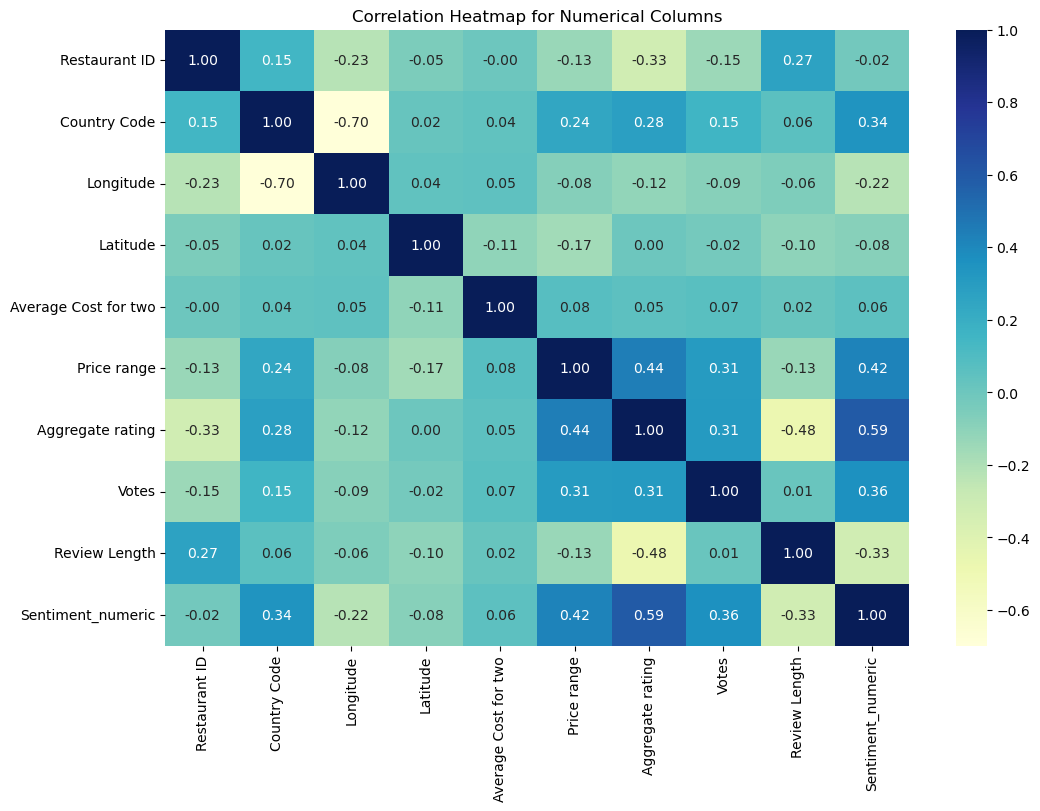

In [15]:
corr_matrix = task3.select_dtypes(["int64", "float64"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# L3 - T3 : Price Range vs. Online Delivery and Table Booking

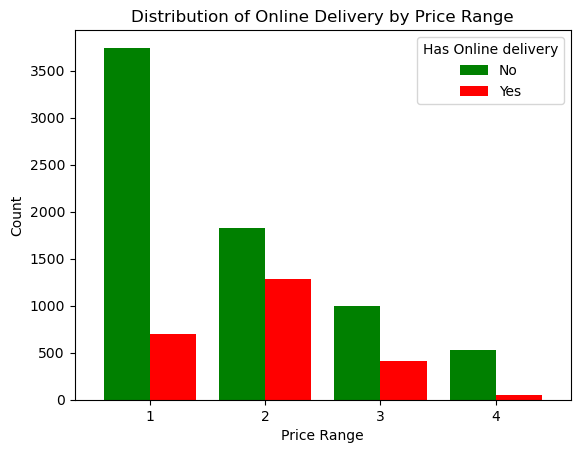

In [16]:
grouped_data = task3.groupby(['Price range', 'Has Online delivery']).size().unstack()

colors = ['green', 'red']
ax = grouped_data.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Online Delivery by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Has Online delivery')
plt.show()

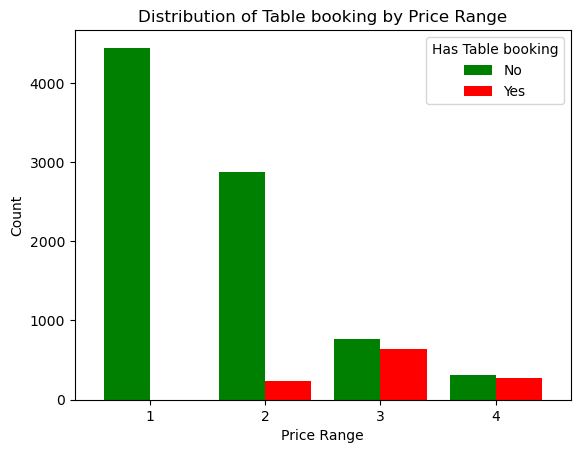

In [17]:
grouped_data = task3.groupby(['Price range', 'Has Table booking']).size().unstack()

colors = ['green', 'red']
ax = grouped_data.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Table booking by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Has Table booking')
plt.show()

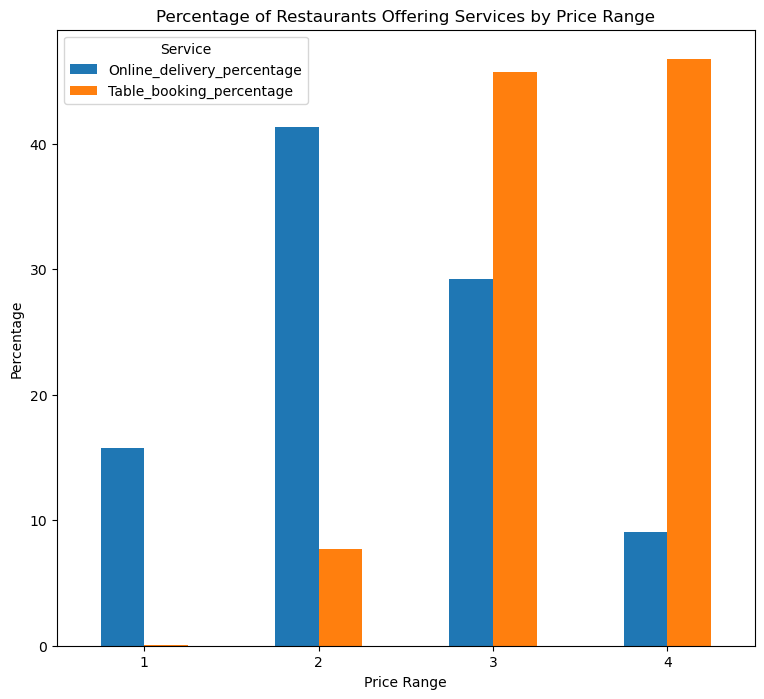

In [18]:
grouped_data = task3.groupby('Price range').agg(
    Online_delivery_percentage=('Has Online delivery', lambda x: (x == 'Yes').mean() * 100),
    Table_booking_percentage=('Has Table booking', lambda x: (x == 'Yes').mean() * 100),
)

# Plot
ax = grouped_data.plot(kind='bar', figsize=(9, 8))
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants Offering Services by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.show()

In [19]:
from scipy.stats import chi2_contingency
#Online Delivery
price_online_contingency = pd.crosstab(task3['Price range'], task3['Has Online delivery'])

chi2, p, _, _ = chi2_contingency(price_online_contingency)
alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between Price range and Online delivery.")
else:
    print("There is no statistically significant association between Price range and Online delivery.")

#Table booking
price_table_booking_contingency = pd.crosstab(task3['Price range'], task3['Has Table booking'])
chi2, p, _, _ = chi2_contingency(price_table_booking_contingency)

if p < alpha:
    print("There is a statistically significant association between Price range and Table booking.")
else:
    print("There is no statistically significant association between Price range and Table booking.")

There is a statistically significant association between Price range and Online delivery.
There is a statistically significant association between Price range and Table booking.
